# **Exploratory Data Analysis** 

In [2]:
# Import the neccessary Libraries
import numpy as np
import pandas as pd

# for vizualise
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# Import and Load dataset
df = pd.read_csv('Dataset/fitness_class_2212.csv')
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [4]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


Features of the Dataset:
Column Name Criteria
1. booking_id Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.
2. months_as_member Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month.
3. weight Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight.
4. days_before Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0.
5. day_of_week Nominal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.
6. time Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.
7. category Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. Replace missing values with “unknown”.
8. attended Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.

In [5]:
# Shape of the data
df.shape

(1500, 8)

In [6]:
# check for missing Values
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [7]:
# Check Column
df.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [8]:
# Check the data types
df.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [9]:
!pip install missingno 

# Data Validation and Prepocessing


In [10]:
# Select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['days_before', 'day_of_week', 'time', 'category']


In [11]:
# Loop through all the categorical column 
for column in cat_vars:
    print(df[column].value_counts())

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64


In [12]:
# Select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(num_vars)

['booking_id', 'months_as_member', 'weight', 'attended']


In [13]:
# Loop through all the numerical column 
for column in num_vars:
    print(df[column].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


In [14]:
# Remove 'days' from 'days_before' column
df['days_before'] = df['days_before'].str.replace(' days', '')

# Replace '-' in category column with 'uknown'
df['category'] = df['category'].str.replace('-', 'unknown')

# Replace 'day_of_week' values with abbreviated versions
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon')

# Replace the missing values in 'weight' column with the overall mean
avg_weight = df['weight'].mean().round(2)
df['weight'].fillna(avg_weight, inplace=True)

# check if there is still missing values in 'weight' column
df['weight'].isnull().sum()


C:\Users\USER\AppData\Local\Temp\ipykernel_124\803509325.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')


0

In [15]:
# Value counts for all columns
df.value_counts()


booking_id  months_as_member  weight  days_before  day_of_week  time  category  attended
1           17                79.56   8            Wed          PM    Strength  0           1
998         11                94.38   4            Tue          PM    HIIT      0           1
1007        4                 97.91   8            Thu          AM    Aqua      0           1
1006        6                 98.25   4            Tue          AM    Cycling   0           1
1005        14                95.60   14           Sun          AM    HIIT      1           1
                                                                                           ..
498         7                 77.92   8            Thu          AM    Cycling   0           1
497         7                 77.96   2            Mon          AM    HIIT      0           1
496         10                89.19   8            Thu          AM    Cycling   0           1
495         4                 89.38   11           Fri          A

months_as_member has 103 outliers: [ 53  73  55  54  76  62  42 105  90  60 107  52  53  37  37  38  48  51
  40  89  57  36  52  38  38  44  39  41  57  36  38  47  58  36  39  66
  48  73  41  45  43  61  48  38  50  40  65  55  39  50  45  38  41  36
  52  39  39  36  43  97  41  36  55  37  39  57  37  39  43  66  44  37
  36  39  47  65  42  38  37  59  51  38  36  38  41  93  41  43  41  38
  54  42 148  58 111  48  53  57  38  39  69  42  54]
weight has 30 outliers: [117.19 113.86 114.17 148.02 115.18 116.26 124.3  135.18 113.32 122.36
 118.89 117.81 120.58 119.63 170.52 121.38 113.93 123.9  113.19 120.81
 114.87 115.91 118.88 116.17 113.45 127.59 136.02 133.36 113.16 129.28]


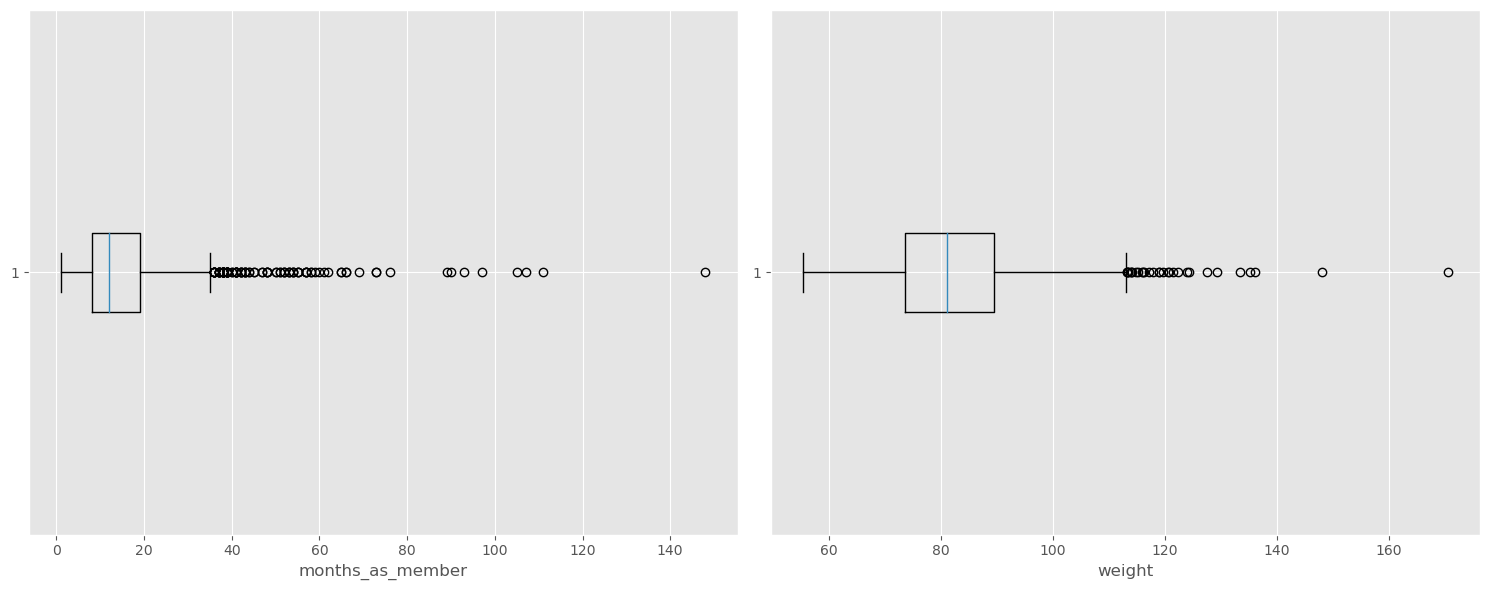

In [16]:
# Columns to visualize to check and visualize outliers
selected_columns = ['months_as_member', 'weight']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 6))

# Loop through the columns to create subplots
for i, column in enumerate(selected_columns):
    # Get the data for the current column
    data = df[column]

    # Create a boxplot
    axes[i].boxplot(data, vert=False)  # Horizontal boxplot

    # Set labels
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('')

    # Identify and handle outliers
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    if not outliers.empty:
        print(f"{column} has {len(outliers)} outliers: {outliers.values}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

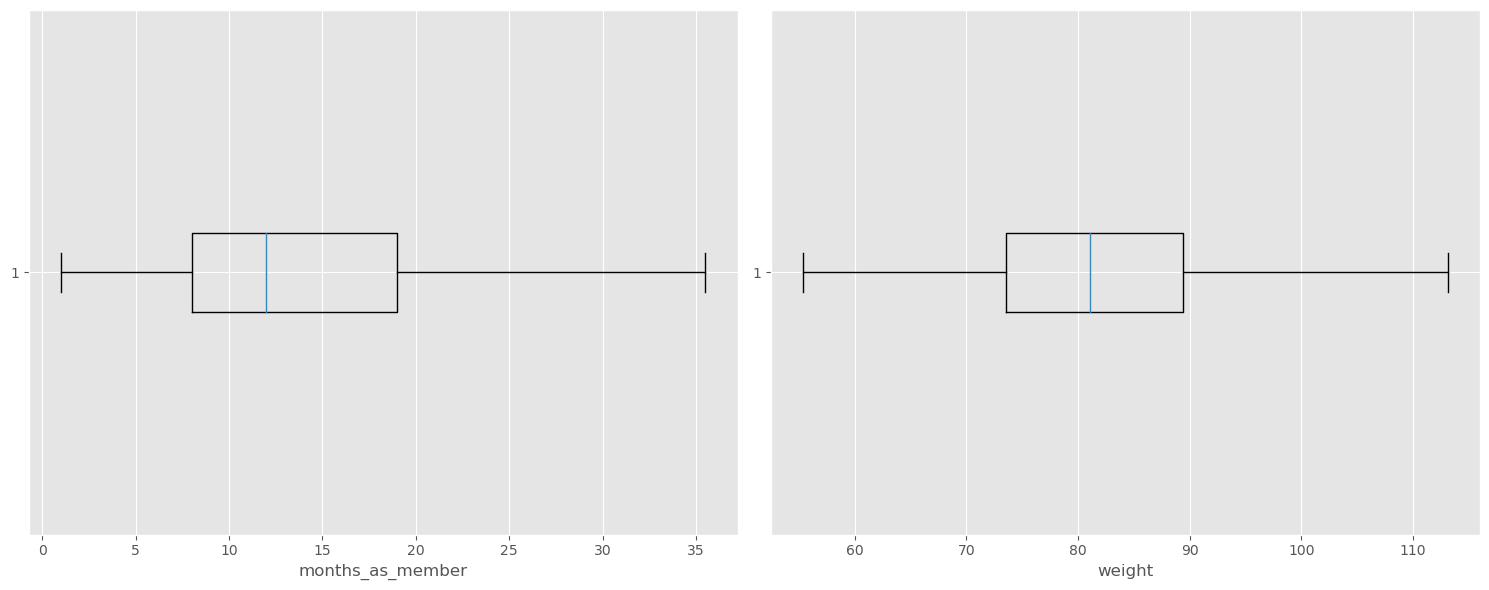

In [17]:
# Columns to visualize
selected_columns = ['months_as_member', 'weight']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Loop through the columns to create subplots
for i, column in enumerate(selected_columns):
    # Get the data for the current column
    data = df[column]  # Access data from the DataFrame
    
    # Replace outliers with median value
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data.clip(lower_bound, upper_bound)
    median = data.median()
    data[(data < lower_bound) | (data > upper_bound)] = median
    
    # Create a boxplot of the data with outliers replaced by median
    axes[i].boxplot(data, vert=False)
    
    # Set labels
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# Summary statistics of data
df.describe().astype('int64')

,booking_id,months_as_member,weight,attended
count,1500,1500,1500,1500
mean,750,15,82,0
std,433,12,12,0
min,1,1,55,0
25%,375,8,73,0
50%,750,12,81,0
75%,1125,19,89,1
max,1500,148,170,1


**The table provides statistical information for four variables: booking_id, months_as_member, weight, and attended. Here is a summary of the statistics:**

- booking_id: The dataset contains 1500 booking IDs. The minimum booking ID is 1, and the maximum booking ID is 1500.
- months_as_member: The average number of months as a member is approximately 15, with a standard deviation of 12. The minimum value is 1, and the maximum value is 148.
- weight: The average weight is approximately 82, with a standard deviation of 12. The minimum weight is 55, and the maximum weight is 170.
- attended: This variable represents whether the booking was attended or not. The dataset consists of 1500 entries, with a mean of 0 (indicating not attended). The variable has a minimum value of 0 and a maximum value of 1.

These statistics provide insights into the distribution and characteristics of the variables in the dataset.

## EXploratory Data Analysis
- Univariate Analyis 
- Bivariate Analyis 
- Multivariate Analysis

Univariate Analysis

- We will consider the each of the features and its visualization to check the distribution 

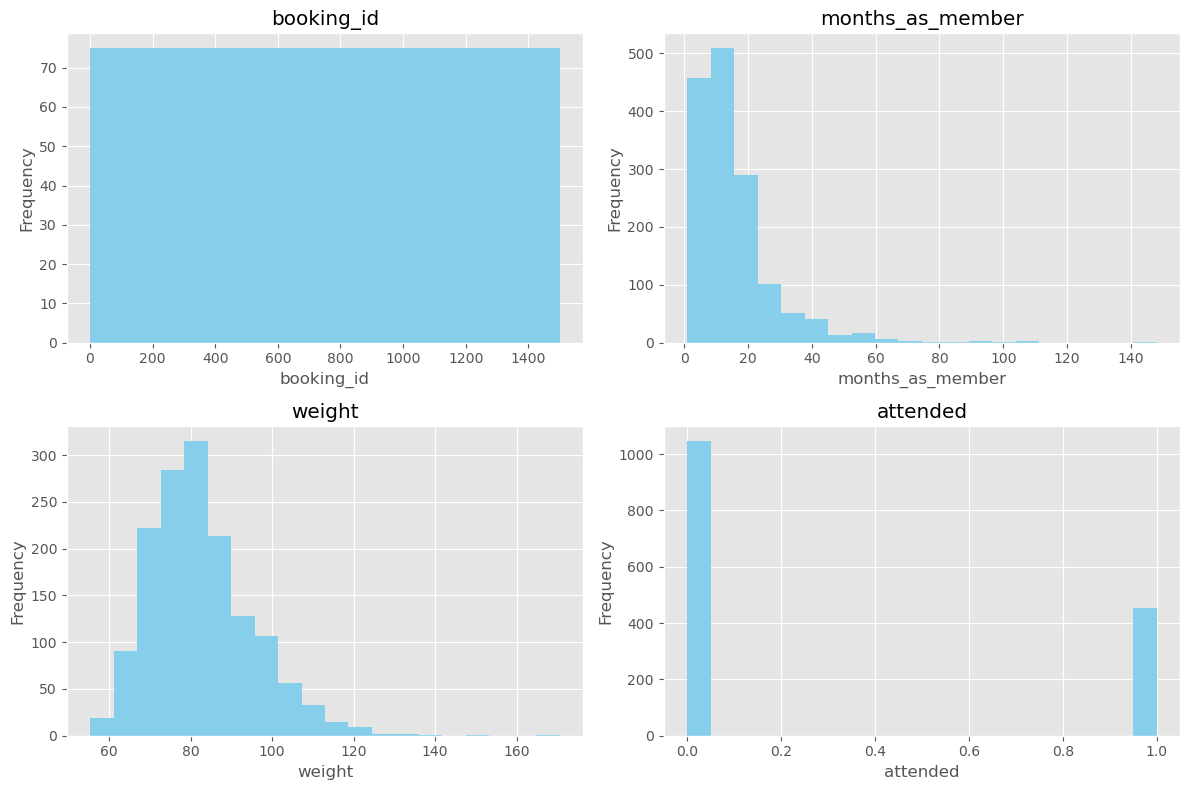

In [19]:
# Select the numerical columns for the subplot
numerical_columns = ['booking_id', 'months_as_member', 'weight', 'attended']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

*The number of bookings in the fitness class platform is 1500. The "month_as_member" variable is skewed to the right, indicating that the majority of the members have been with the platform for at least 15 months. In terms of the "weight" column, the majority of members weigh 82 pounds and above. However, there are only two members who weigh between 140 and 170 pounds, respectively. Additionally, there are more people who do not attend the fitness classes compared to those who do attend.*

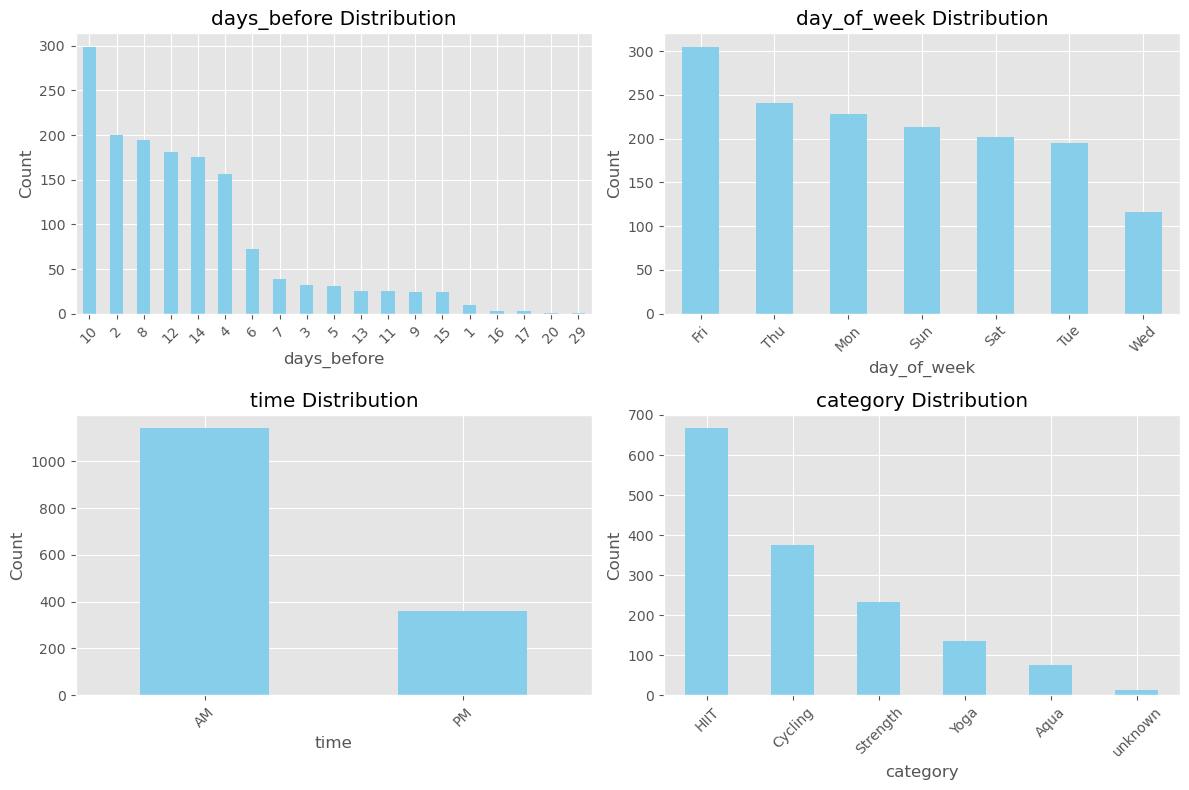

In [20]:
# Select the categorical columns for the subplot
categorical_columns = ['days_before', 'day_of_week', 'time', 'category']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the categorical columns and plot them
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Here are some insights:**

**Days Before Distribution:**

The highest frequency of events or actions occurs roughly 10 days before a particular date or deadline.
The frequency then decreases gradually as we approach the said date or deadline.
Very few events occur close to the day of interest, with a notable dip around the 20-25 day range.

**Day of the Week Distribution:**

Friday appears to be the most popular or busiest day, with the highest count.
Wednesday has the least number of events or actions among the days of the week.
The activity level seems to be relatively consistent from Thursday to Tuesday, with slight variations.


**Time Distribution:**

A vast majority of events or actions happen during the AM (morning) hours.
The frequency in the PM (afternoon/evening) is significantly less than that of the AM.


**Category Distribution:**

HIIT (High-Intensity Interval Training) is the most popular category, with the highest count.
Yoga and Aqua have relatively low counts, indicating they might be less popular or less frequently conducted.
There's a category labeled 'Unknown' which suggests that some data points don't have a clear category associated with them or it wasn't recorded.
In summary, it appears that most events or actions are concentrated around 10 days before a certain date, mostly happen on Fridays and in the mornings, and HIIT sessions are the most popular category.






In [21]:
df.head(5)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


# **Bivariate Analysis**

In [22]:
attendance_by_category = df.groupby('category')['attended'].sum()

print(attendance_by_category)


category
Aqua         25
Cycling     110
HIIT        213
Strength     62
Yoga         42
unknown       2
Name: attended, dtype: int64


In [23]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

print(category_attendance_counts)

category  attended
Aqua      0            51
          1            25
Cycling   0           266
          1           110
HIIT      0           454
          1           213
Strength  0           171
          1            62
Yoga      0            93
          1            42
unknown   0            11
          1             2
Name: booking_id, dtype: int64


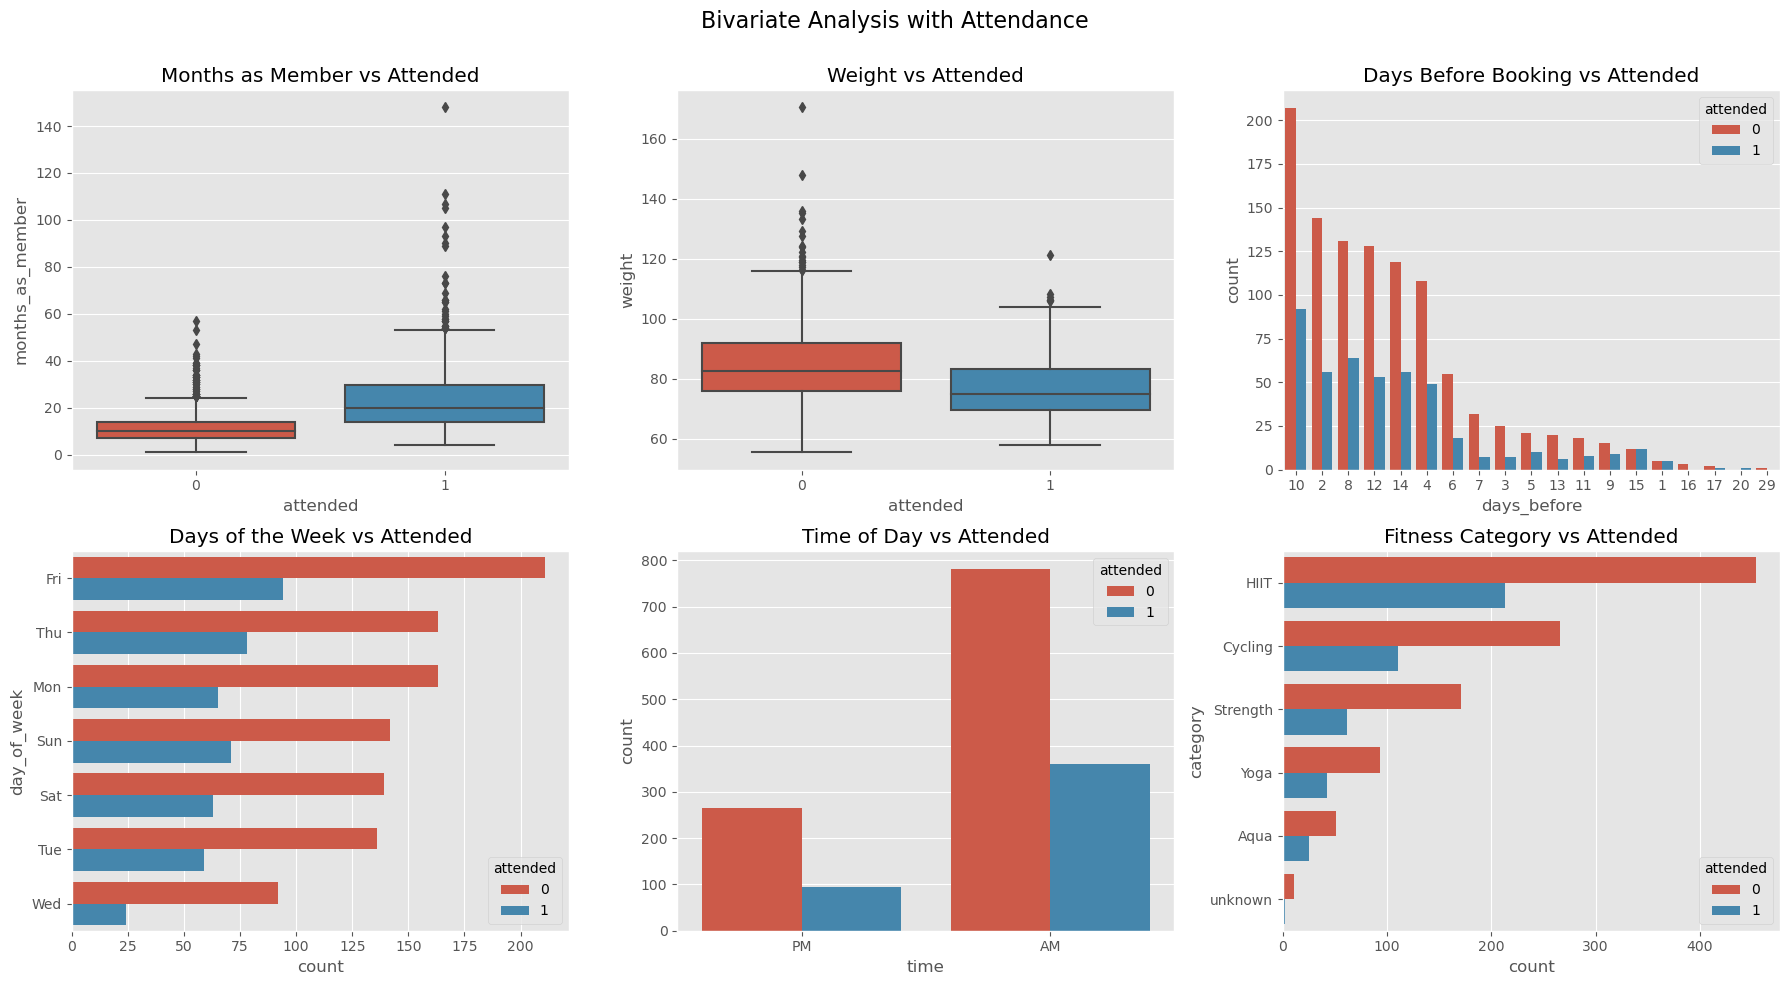

In [24]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bivariate Analysis with Attendance', fontsize=16)

# Plotting months_as_member vs attended
sns.boxplot(x=df['attended'], y=df['months_as_member'], ax=ax[0, 0])
ax[0, 0].set_title('Months as Member vs Attended')

# Plotting weight vs attended
sns.boxplot(x=df['attended'], y=df['weight'].dropna(), ax=ax[0, 1])
ax[0, 1].set_title('Weight vs Attended')

# Plotting days_before vs attended
sns.countplot(x=df['days_before'], hue=df['attended'], order=df['days_before'].value_counts().index, ax=ax[0, 2])
ax[0, 2].set_title('Days Before Booking vs Attended')

# Plotting day_of_week vs attended
sns.countplot(y=df['day_of_week'], hue=df['attended'], order=df['day_of_week'].value_counts().index, ax=ax[1, 0])
ax[1, 0].set_title('Days of the Week vs Attended')

# Plotting time vs attended
sns.countplot(x=df['time'], hue=df['attended'], ax=ax[1, 1])
ax[1, 1].set_title('Time of Day vs Attended')

# Plotting category vs attended
sns.countplot(y=df['category'], hue=df['attended'], order=df['category'].value_counts().index, ax=ax[1, 2])
ax[1, 2].set_title('Fitness Category vs Attended')

# Adjusting layout
plt.tight_layout()
fig.subplots_adjust(top=0.90)

# Show the plot
plt.show()


**Months as Member vs Attended:**

Members who have been around longer (higher months) tend to attend more often.
Newer members (lower months) have a wider spread in attendance.

**Weight vs Attended:**
The median weight of attendees and non-attendees is quite similar.
There isn't a very distinct pattern between weight and attendance.

**Days Before Booking vs Attended:**
Members who book 7 or 14 days in advance seem to have a higher rate of non-attendance.
Members who book 1 day in advance tend to attend more often.

**Days of the Week vs Attended:**
Attendance seems lower on Wednesdays and higher on Thurdays and Fridays.
Sunday, being the least popular day for bookings, also has a low attendance rate.

**Time of Day vs Attended:**
AM classes have a higher attendance rate compared to PM classes.

**Fitness Category vs Attended:**

The "HIIT" category has a higher rate of attendance.
"HIIT" and "Cycling" classes have more non-attendees compared to attendees.

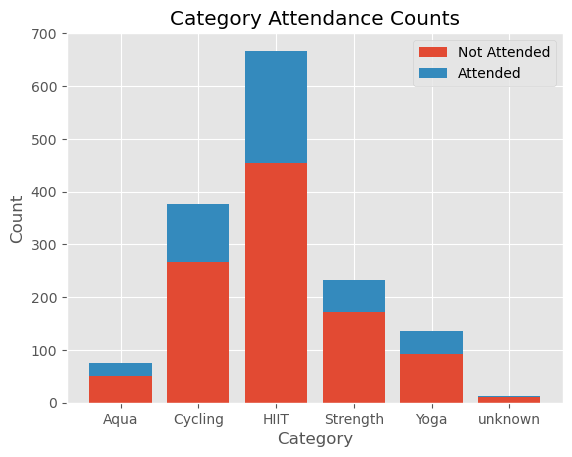

In [25]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

# Reshape the data for plotting
data = category_attendance_counts.unstack()
categories = data.index
attendance = [data[0], data[1]]
plt.bar(categories, attendance[0], label='Not Attended')
plt.bar(categories, attendance[1], bottom=attendance[0], label='Attended')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Attendance Counts')
plt.legend()
plt.show()


Popularity by Category:

HIIT (High-Intensity Interval Training) has the highest overall attendance. This suggests that it is the most popular category among the members.
Aqua and Cycling have relatively lower attendance compared to the other categories, indicating that they might be less popular or perhaps offered less frequently.
Attendance vs Non-Attendance:

HIIT not only has the highest attendance but also has a significant number of members who didn't attend. This could mean that while HIIT is popular, it might also be intimidating or not suitable for everyone.
Strength and Yoga classes have a more balanced ratio between those who attended and those who did not.
Aqua and Cycling show a more noticeable gap with higher non-attendance rates compared to their attendance rates. This might imply that these categories are not as appealing to the broader membership or are niche in nature.
The unknown category has relatively equal attendance and non-attendance counts, which is intriguing. This might represent classes or sessions that members are unsure about or haven't been properly categorized.
General Attendance Trend:

The majority of categories, except for Aqua and Cycling, have higher non-attendance counts than attendance counts. This could indicate various factors like scheduling conflicts, class difficulty, or general member preferences affecting attendance.
Potential Areas of Improvement:

Given the high non-attendance rates for certain categories, it might be worthwhile for the organization to consider gathering feedback to understand member preferences better and adapt the class offerings accordingly.
In summary, while HIIT seems to be the most popular category among members, there are still significant non-attendance rates across all categories. Engaging with members to understand their needs and preferences might provide valuable insights to enhance attendance rates and overall member satisfaction.




In [26]:
correlation = df['weight'].corr(df['attended'])

print(f"Correlation between weight and attendance: {correlation}")

Correlation between weight and attendance: -0.2835213591433109


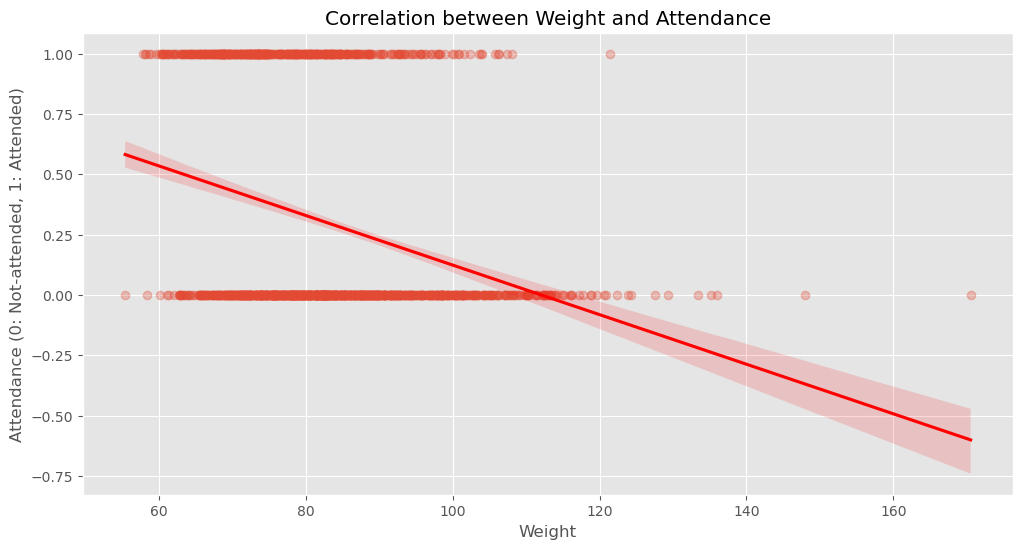

In [27]:
# Scatter plot with regression line for weight vs attendance
plt.figure(figsize=(12, 6))
sns.regplot(x=df['weight'], y=df['attended'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation between Weight and Attendance')
plt.xlabel('Weight')
plt.ylabel('Attendance (0: Not-attended, 1: Attended)')
plt.show()


The scatter plot above visually represents the relationship between a member's weight and their attendance to fitness classes. The regression line, drawn in red, showcases a downward trend, confirming the negative correlation value of 
−0.2835

A negative correlation suggests that as one variable increases, the other tends to decrease. In this context, as the weight of the members increases, their likelihood of attending the class decreases.

# **Multivariate Analysis**

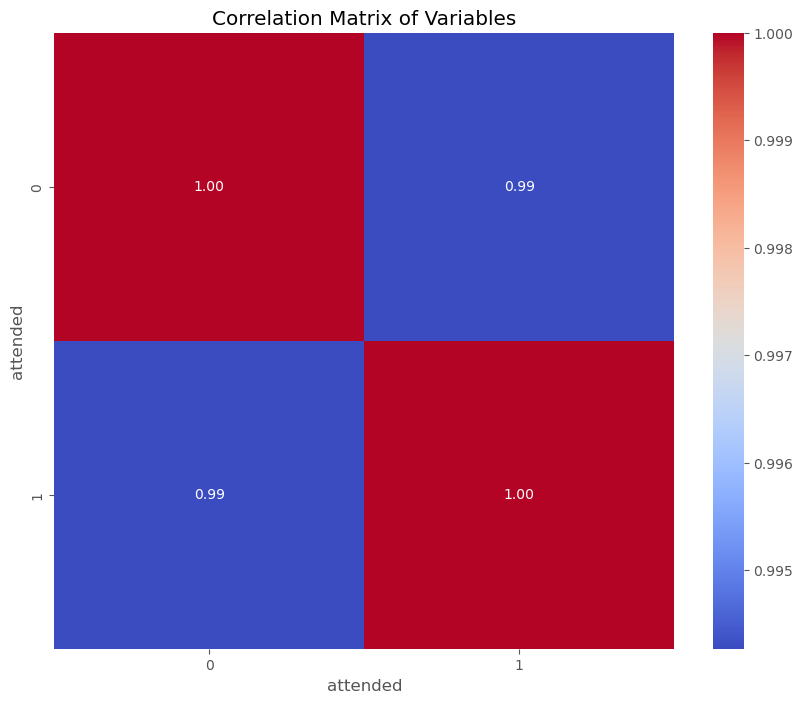

In [28]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

**This matrix suggests that there's a very high positive correlation between the two variables**

# Building A Model to Predict

**Convert categoricalcolumn to numerical column**

**Label Encoding**

In [29]:
from sklearn.preprocessing import LabelEncoder

convert_columns = ['day_of_week', 'time', 'category']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
for column in convert_columns:
    df[column] = le.fit_transform(df[column])

# Print the first two rows of the transformed columns
print(df[convert_columns].head(2))

   day_of_week  time  category
0            6     1         3
1            1     0         2


In [30]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,6,1,3,0
1,2,10,79.01,2,1,0,2,0
2,3,16,74.53,14,3,0,3,0
3,4,5,86.12,10,0,0,1,0
4,5,15,69.29,8,4,0,2,0


# **Feature Selection**

In [31]:
# select the target variable y
y = df['attended']

# drop the target variable and create the independent variable X
X = df.drop('attended', axis = 1)

In [32]:
# check the head of y and X
print(y.head())
print('......................................................................................................')
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: attended, dtype: int64
......................................................................................................
   booking_id  months_as_member  weight days_before  day_of_week  time  \
0           1                17   79.56           8            6     1   
1           2                10   79.01           2            1     0   
2           3                16   74.53          14            3     0   
3           4                 5   86.12          10            0     0   
4           5                15   69.29           8            4     0   

   category  
0         3  
1         2  
2         3  
3         1  
4         2  


# **Oversampling Using SMOTE**
SMOTE creates sythetic samples by interpolating between te neighbouring instances of the minority class

In [33]:
# showing the imbalance of 'attended' class
y.value_counts()

0    1046
1     454
Name: attended, dtype: int64

In [34]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 1046, 1: 454})
Class distribution after resampling: Counter({0: 1046, 1: 1046})


## Train-Test-Split
We are splitting the X and y into training set and testing using 70-30 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training amd testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       booking_id  months_as_member     weight days_before  day_of_week  time  \
1521         307                14  90.958649    7.789901            1     0   
1431        1432                 6  82.570000         2.0            1     0   

      category  
1521         1  
1431         1  

       booking_id  months_as_member  weight days_before  day_of_week  time  \
1280        1281                 7  102.60        12.0            2     0   
29            30                27   98.91        12.0            2     0   

      category  
1280         2  
29           4  

 1521    1
1431    0
Name: attended, dtype: int64

 1280    0
29      1
Name: attended, dtype: int64


In [ ]:
print('\n The Shape of X_train', X_train.shape)
print('\n The Shape of X_test', X_test.shape)
print('\n The Shape of y_train', y_train.shape)
print('\n The Shape of y_test', y_test.shape)


 The Shape of X_train (1464, 7)

 The Shape of X_test (628, 7)

 The Shape of y_train (1464,)

 The Shape of y_test (628,)


## Data Scaling (Standardization)
It is also called data standardization: it is a preprocessing step towards transforming the features of the data to have a similar scale. It is important because machine learning algorithms perform better or converge faster when the features are on a similar scale.

**Methods of Scaling:**
- Min-Max Scaling
- Standard Scaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

## Model Selection
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier


In [ ]:
# import the algorithms for the model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning
from sklearn.model_selection import cross_val_score, cross_val_predict

## **Logistic_Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# print the accuracy score for logistic regression
print(f'The accuracy score for logistic regression is {accuracy_score(y_pred, y_test).round(2)*100}' + '%')

The accuracy score for logistic regression is 73.0%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''calculates and return a dictionatry of performance metrics for a binary classification model'''

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1_Score': f1}

    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
print(lr_result)

{'Model': 'lr_model', 'Accuracy': 0.7292993630573248, 'Precision': 0.7716262975778547, 'Recall': 0.6819571865443425, 'F1_Score': 0.724025974025974}


## **Decision_Tree_Classifier**

In [ ]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = dc_model.predict(X_test_scaled)
dc_probs = dc_model.predict_proba(X_test_scaled)[:, 1]
# print the accuracy score for decision tree classifier
print(f'The accuracy score for decision tree is {accuracy_score(y_pred, y_test).round(2)*100}' + '%')

The accuracy score for decision tree is 73.0%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''calculates and return a dictionatry of performance metrics for a binary classification model'''

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1_Score': f1}

    return results

dc_result = metrics_calculator(y_test, y_pred, 'dc_model')
print(dc_result)

{'Model': 'dc_model', 'Accuracy': 0.7277070063694268, 'Precision': 0.7452830188679245, 'Recall': 0.7247706422018348, 'F1_Score': 0.7348837209302326}


## **Random_Forest_Classifier**

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
# print the accuracy score for random forest classifier
print(f'The accuracy score for random forest is {accuracy_score(y_pred, y_test).round(2)*100}' + '%')

The accuracy score for random forest is 79.0%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''calculates and return a dictionatry of performance metrics for a binary classification model'''

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1_Score': f1}

    return results

rf_result = metrics_calculator(y_test, y_pred, 'rf_model')
print(rf_result)


{'Model': 'rf_model', 'Accuracy': 0.785031847133758, 'Precision': 0.8157894736842105, 'Recall': 0.7584097859327217, 'F1_Score': 0.786053882725832}


Logistic Regression Classification Report:
              precision    recall  f1-score   support

Not Attended       0.69      0.78      0.73       301
    Attended       0.77      0.68      0.72       327

    accuracy                           0.73       628
   macro avg       0.73      0.73      0.73       628
weighted avg       0.73      0.73      0.73       628



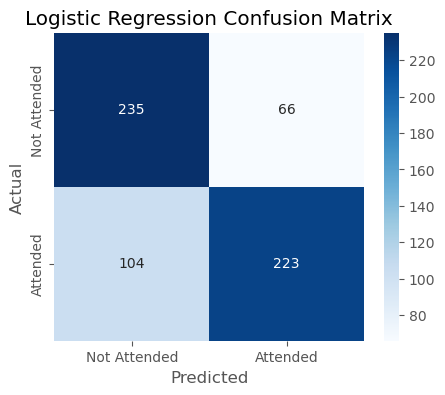

Decision Tree Classification Report:
              precision    recall  f1-score   support

Not Attended       0.71      0.73      0.72       301
    Attended       0.75      0.72      0.73       327

    accuracy                           0.73       628
   macro avg       0.73      0.73      0.73       628
weighted avg       0.73      0.73      0.73       628



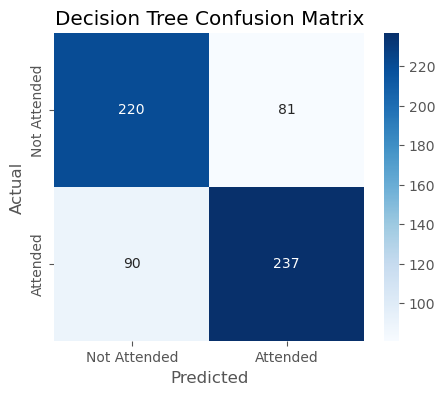

Random Forest Classification Report:
              precision    recall  f1-score   support

Not Attended       0.76      0.81      0.78       301
    Attended       0.82      0.76      0.79       327

    accuracy                           0.79       628
   macro avg       0.79      0.79      0.79       628
weighted avg       0.79      0.79      0.79       628



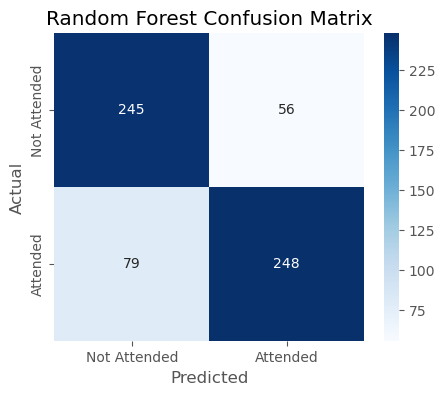

In [ ]:
# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
models = [lr_model, dc_model, rf_model]

# Set the labels
labels = ['Not Attended', 'Attended']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report
for i, model in enumerate(models):
    # Predict the classes of the testing set
    y_pred = model.predict(X_test_scaled)

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=labels)
    print(f'{model_names[i]} Classification Report:\n{report}')

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_names[i]} Confusion Matrix')
    plt.show()

In [ ]:
# Concatenate Results into a single DataFrame of all the metric calculator results
result_df = pd.DataFrame([lr_result, dc_result, rf_result])

# Print the DataFrame
result_df

,Model,Accuracy,Precision,Recall,F1_Score
0,lr_model,0.729299,0.771626,0.681957,0.724026
1,dc_model,0.727707,0.745283,0.724771,0.734884
2,rf_model,0.785032,0.815789,0.758410,0.786054


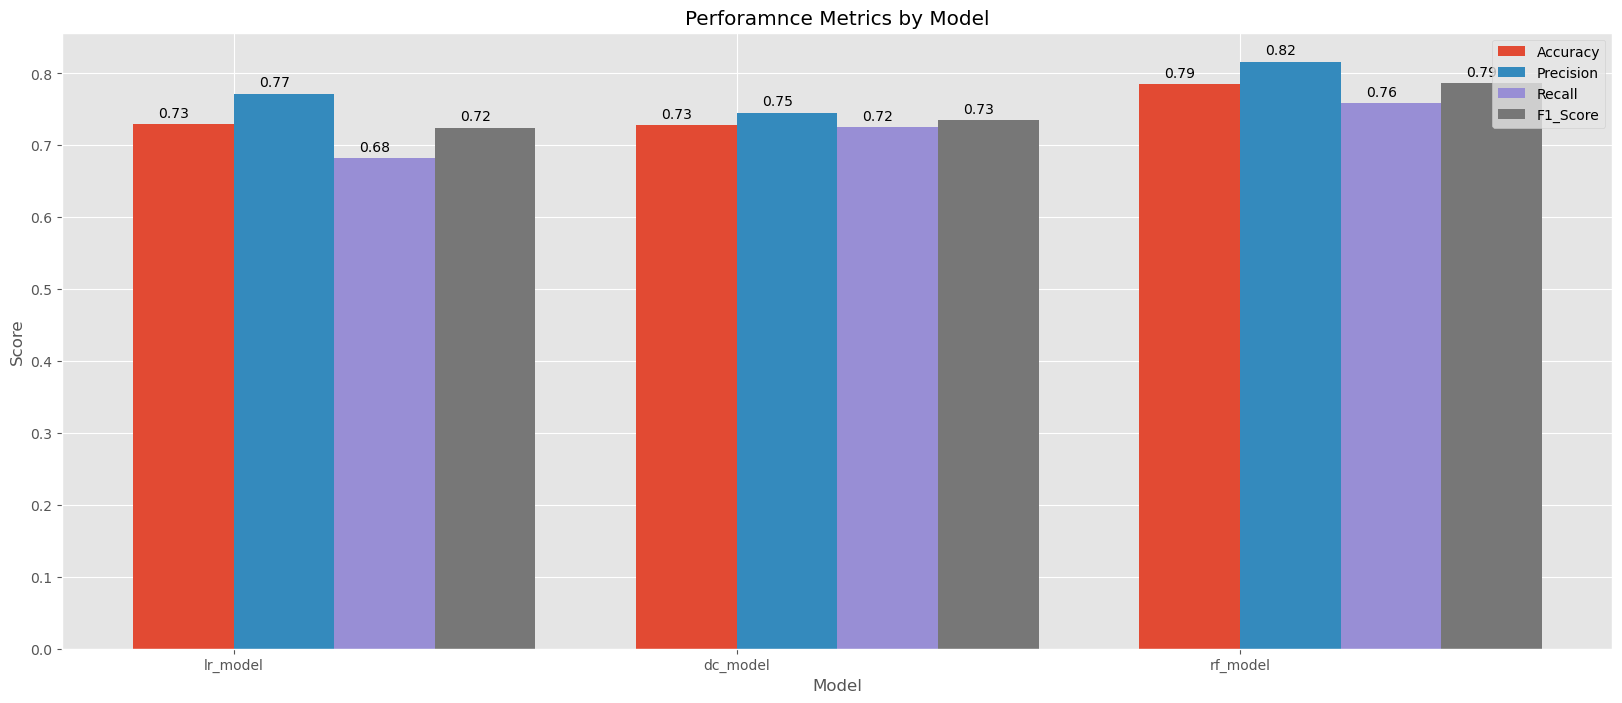

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = result_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, result_df[metric], width = bar_width, label = metric)
    for j, value in enumerate(result_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perforamnce Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()

## Overall Model Performance
The Area Under the ROC Curve (AUC-ROC) is a performance metric used to evaluate the performance of a binary classification model. It measures the ability of the model to distinguish between positive and negative classes.

The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various classification thresholds. The AUC-ROC score represents the area under this curve, which ranges from 0 to 1. A higher AUC-ROC score indicates better model performance, with 1 being a perfect classifier and 0.5 representing a random classifier.

The AUC-ROC score provides a comprehensive evaluation of a model's performance across all possible classification thresholds, making it a popular metric in machine learning.

In [ ]:
# Calculate AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)
# Calculate AUC-ROC for Decision Tree
dt_auc = roc_auc_score(y_test, dc_probs)
# Calculate AUC-ROC for Random Forest
rf_auc = roc_auc_score(y_test, rf_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Random Forest AUC-ROC: {rf_auc:.2f}')

Logistic Regression AUC-ROC: 0.82
Decision Tree AUC-ROC: 0.73
Random Forest AUC-ROC: 0.88


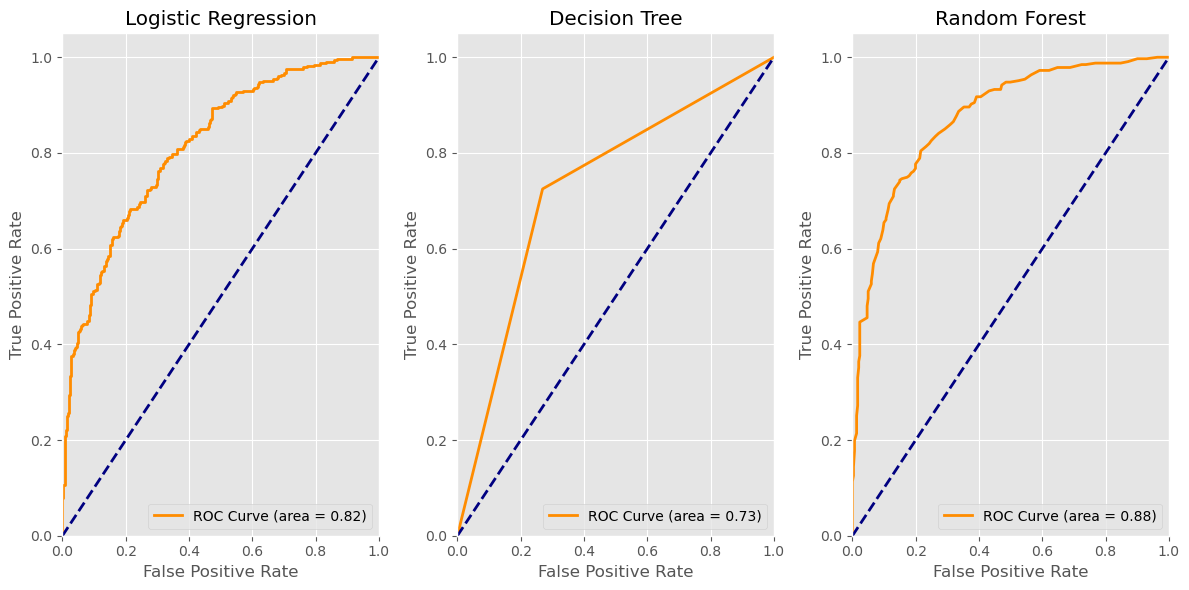

In [ ]:
from sklearn.metrics import roc_curve, auc
# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
models = [lr_model, dc_model, rf_model]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols =3, figsize=(12,6))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    axes[i].plot(fpr, tpr, color = 'darkorange', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc = 'lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

*The Random Forest model achieved the highest AUC-ROC score of 0.87, indicating that it has a strong ability to distinguish between positive and negative instances. This means that the true positive rate (correctly predicting those who attended the fitness class) is high compared to the false positive rate (incorrectly predicting those who didn't attend). In other words, the model is effective at classifying individuals based on their attendance in the fitness class.*

## **Feature Importance and Engineering**

After training the best performing model which is Random Forest, I will analyze feature importance. For example, I will use Random Forest Classifier to check feature importances as follows:

In [ ]:
# Feature Importances using Random Forest
feature_importances = rf_model.feature_importances_

# Display feature importances along side feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

months_as_member: 0.34709818286929894
weight: 0.2261750112657735
booking_id: 0.16767777341929946
days_before: 0.11053181254165245
day_of_week: 0.06285931371519364
category: 0.061175648739770834
time: 0.024482257449011207


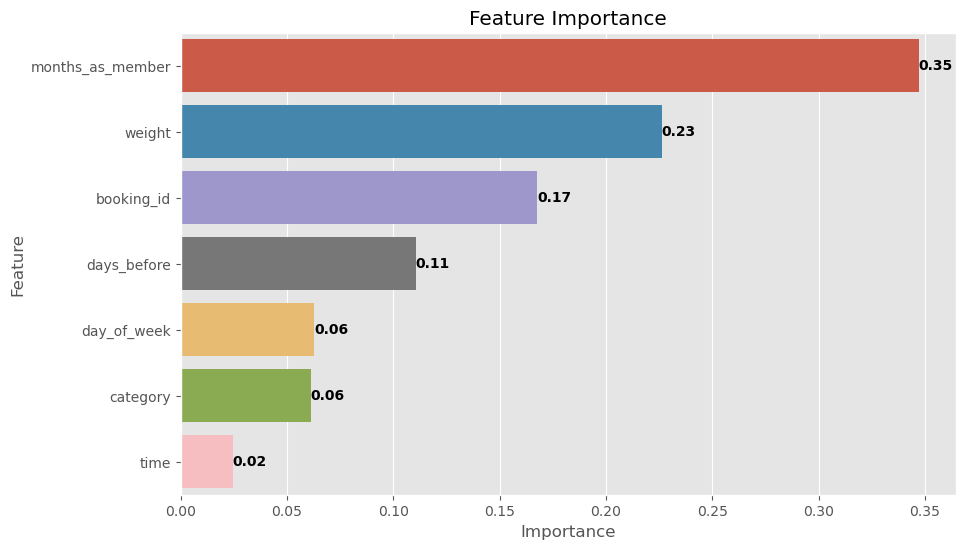

In [ ]:
# Assuming 'rf_model' is my Random Forest Model and I have already trained it
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create  DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'importance': feature_importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by = 'importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize = (10, 6))
ax = sns.barplot(x='importance', y='Feature', data=feature_importances_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

The feature importances of a fitness class prediction Random Forest model based on their importance scores from the chart. It shows that month_as_member, followed by weight, booking_id, and days_before are the major predictors. Category, day_of_week, and time were also important but to a lesser extent

## A Bit of Feature Selection
I will use the feature importance obtained from the Random Forest model to select the most important features. I will want to select the following features:'month_as_member', 'weight', 'booking_id', and 'days_before' as I have Identified these columns in the dataset.

In [ ]:
# Split into training and validation set using 30% split ratio 
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['months_as_member', 'weight', 'booking_id', 'days_before']]
X_valid2 = X_valid[['months_as_member', 'weight', 'booking_id', 'days_before']]

## Model Training and Validation
Fit the best performing Random Forest model on the selected features and make predictions on the validation set.

In [ ]:
# Assuming 'rf_mode' is the best performing  model
rf_model.fit(X_train2, y_train)
y_valid2_pred = rf_model.predict(X_valid2)

In [ ]:
# Print the accuracy score of the model
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy.round(3)*100}' + '%')


Accuracy Score: 76.8%


## HyperParameters Tuning

In [ ]:
from sklearn.model_selection import cross_val_score

# As Random Forest is the best model # print mean cv for accuracy
cv_scores = cross_val_score(rf_model, X_train2, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Score on Training Set:', cv_scores.round(2))
print(f'Mean CV Accuracy Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')

Cross-Validation Accuracy Score on Training Set: [0.8  0.82 0.82 0.78 0.79 0.73 0.75 0.73 0.84 0.77]
Mean CV Accuracy Score on Training Set: 78.0%


In [ ]:
# As Random Forest is the best model # print mean cv for precision
cv_scores = cross_val_score(rf_model, X_train2, y_train, cv=10, scoring='precision')
print('Cross-Validation Precision Score on Training Set:', cv_scores.round(2))
print(f'Mean CV Precision Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')

Cross-Validation Precision Score on Training Set: [0.82 0.83 0.79 0.85 0.78 0.73 0.77 0.75 0.85 0.75]
Mean CV Precision Score on Training Set: 79.0%


In [ ]:
# As Random Forest is the best model # print mean cv for recall
cv_scores = cross_val_score(rf_model, X_train2, y_train, cv=10, scoring='recall')
print('Cross-Validation Recall Score on Training Set:', cv_scores.round(2))
print(f'Mean CV Recall Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')

Cross-Validation Recall Score on Training Set: [0.81 0.82 0.84 0.78 0.85 0.78 0.81 0.73 0.79 0.71]
Mean CV Recall Score on Training Set: 79.0%


In [ ]:
from sklearn.metrics import f1_score
# Calculate f1_score
precision = 0.8
recall = 0.8

f1 = 2 * (precision * recall) / (precision + recall)
f1_percentage = f1 * 100
print(f'The F1-Score of the Random Forest is {f1_percentage:.1f}%')

The F1-Score of the Random Forest is 80.0%


**The F1-score for the precision and recall is 0.80, which indicates that a balance was struck between correctly identifying individuals who attended the fitness class(recall) and minimizing false positives(precision). It helps to evaluate the trade-off betwen these two metrics.**


## Model Conclusion
*Random Forest Model has shown to be the best performing model in all of the selected models based on the classification metrics for evaluating their performances. Also, based on the hyperparameter tuning, the Random Forest model can generalize well on new or unseen data and it won't overfit.*